# Sprint 10 — Pesquisa de Mercado: Cafeteria com Garçons Robôs em Los Angeles

Neste projeto, vamos analisar dados de restaurantes em Los Angeles para entender o mercado local, identificar tipos de estabelecimentos predominantes, características de redes, e preparar recomendações para o sucesso de uma cafeteria com garçons robôs.


In [1]:
# Importação das bibliotecas e leitura dos dados

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

# Leitura do arquivo CSV
file_path = '/datasets/rest_data_us_upd.csv'
rest_data = pd.read_csv(file_path)

# Visualizar as primeiras linhas
rest_data.head()


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


### Inspeção inicial dos dados

Vamos conferir os tipos das colunas, valores ausentes e duplicados para garantir que os dados estejam limpos para análise.


In [2]:
# Tipos das colunas
print(rest_data.dtypes)

# Verificar valores ausentes
print(rest_data.isna().sum())

# Verificar duplicatas
print(f'Duplicatas: {rest_data.duplicated().sum()}')


id              int64
object_name    object
address        object
chain          object
object_type    object
number          int64
dtype: object
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64
Duplicatas: 0


### Limpeza e preparação dos dados

- Corrigir os tipos de dados, se necessário
- Tratar valores ausentes 
- Remover duplicatas
- Padronizar strings 


In [3]:
# Corrigir tipo da coluna 'chain' 
rest_data['chain'] = rest_data['chain'].astype(bool)

# Remover duplicatas
rest_data = rest_data.drop_duplicates()

# Remover espaços em branco dos nomes e tipos
rest_data['object_name'] = rest_data['object_name'].str.strip()
rest_data['object_type'] = rest_data['object_type'].str.strip()
rest_data['address'] = rest_data['address'].str.strip()

# Verificar novamente
print(rest_data.isna().sum())
print(f'Duplicatas após limpeza: {rest_data.duplicated().sum()}')


id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64
Duplicatas após limpeza: 0


# Passo 2 — Análise de dados

### 1. Proporção dos tipos de estabelecimentos

Vamos verificar quais tipos de estabelecimento são mais comuns.


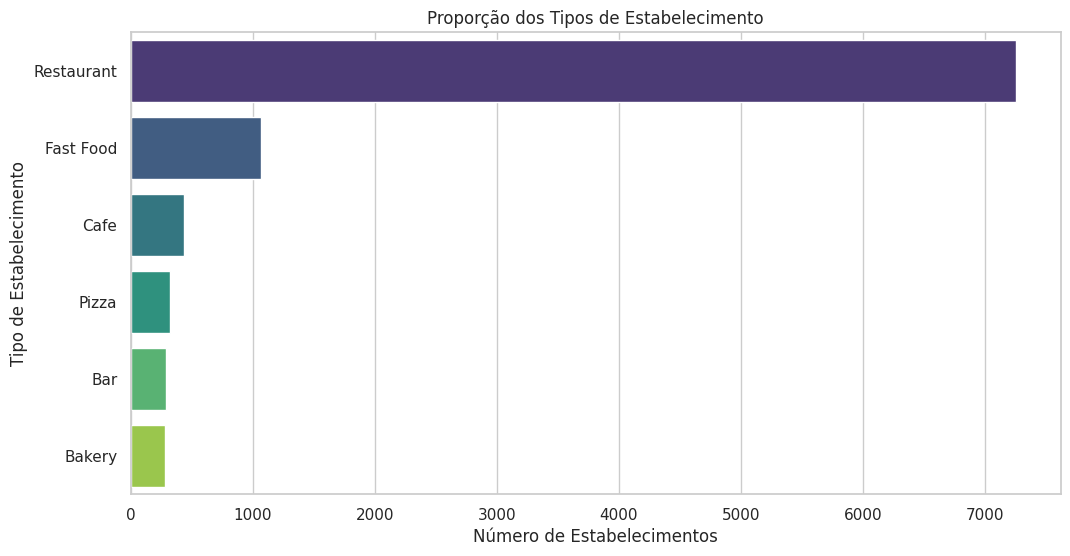

In [13]:
type_counts = rest_data['object_type'].value_counts()
sns.barplot(y=type_counts.index, x=type_counts.values, palette='viridis')
plt.title('Proporção dos Tipos de Estabelecimento')
plt.xlabel('Número de Estabelecimentos')
plt.ylabel('Tipo de Estabelecimento')
plt.show()


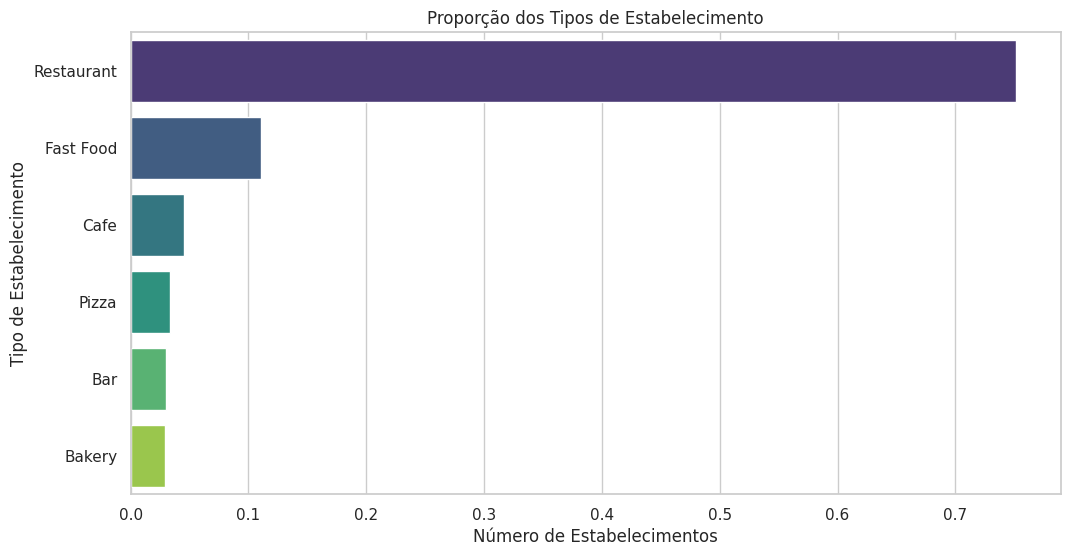

In [4]:
#type_counts = rest_data['object_type'].value_counts()
type_counts = rest_data['object_type'].value_counts(normalize=True)
sns.barplot(y=type_counts.index, x=type_counts.values, palette='viridis')
plt.title('Proporção dos Tipos de Estabelecimento')
plt.xlabel('Número de Estabelecimentos')
plt.ylabel('Tipo de Estabelecimento')
plt.show()


Analisamos os tipos de estabelecimentos cadastrados em Los Angeles. Observamos que certos tipos, como "restaurant" ou "cafe", são mais predominantes. Esse dado é importante para identificar o perfil do mercado local e qual modelo tem maior aceitação.


### 2. Proporção de estabelecimentos de rede vs. não rede


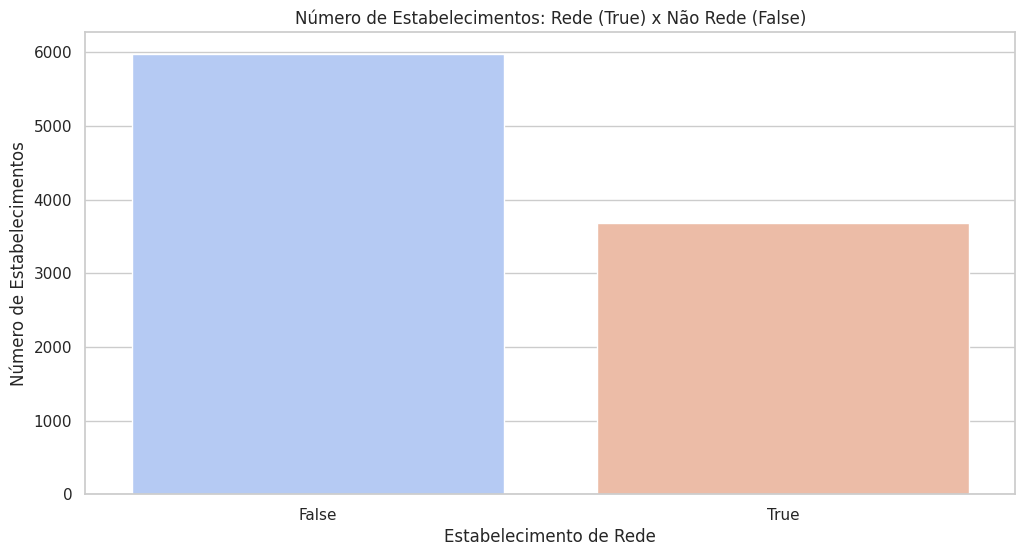

In [5]:
chain_counts = rest_data['chain'].value_counts()
sns.barplot(x=chain_counts.index.astype(str), y=chain_counts.values, palette='coolwarm')
plt.title('Número de Estabelecimentos: Rede (True) x Não Rede (False)')
plt.xlabel('Estabelecimento de Rede')
plt.ylabel('Número de Estabelecimentos')
plt.show()




A maior parte dos estabelecimentos não pertence a redes. Isso pode indicar que o mercado de LA é mais pulverizado, com foco em negócios independentes. No entanto, redes ainda têm presença relevante, o que pode ser estratégico para expansão futura.


### 3. Tipo típico para estabelecimentos de rede

Vamos verificar quais tipos predominam nas redes.


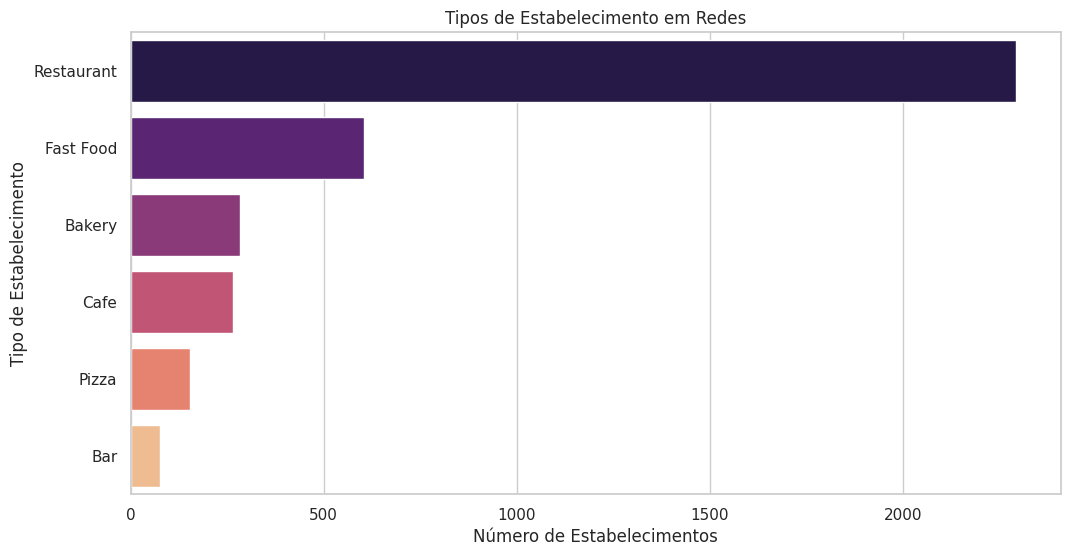

In [6]:
chain_types = rest_data[rest_data['chain'] == True]['object_type'].value_counts()
sns.barplot(y=chain_types.index, x=chain_types.values, palette='magma')
plt.title('Tipos de Estabelecimento em Redes')
plt.xlabel('Número de Estabelecimentos')
plt.ylabel('Tipo de Estabelecimento')
plt.show()




Aqui, identificamos quais tipos de estabelecimentos mais aparecem em redes. Estabelecimentos como “fast food” ou “cafe” tendem a ser mais replicáveis e padronizáveis, o que os torna ideais para modelos de franquia.


### 4. Características das redes

Queremos entender se redes possuem muitos estabelecimentos com poucos assentos, ou poucos estabelecimentos com muitos assentos.


chain
False    46.171467
True     39.675455
Name: number, dtype: float64


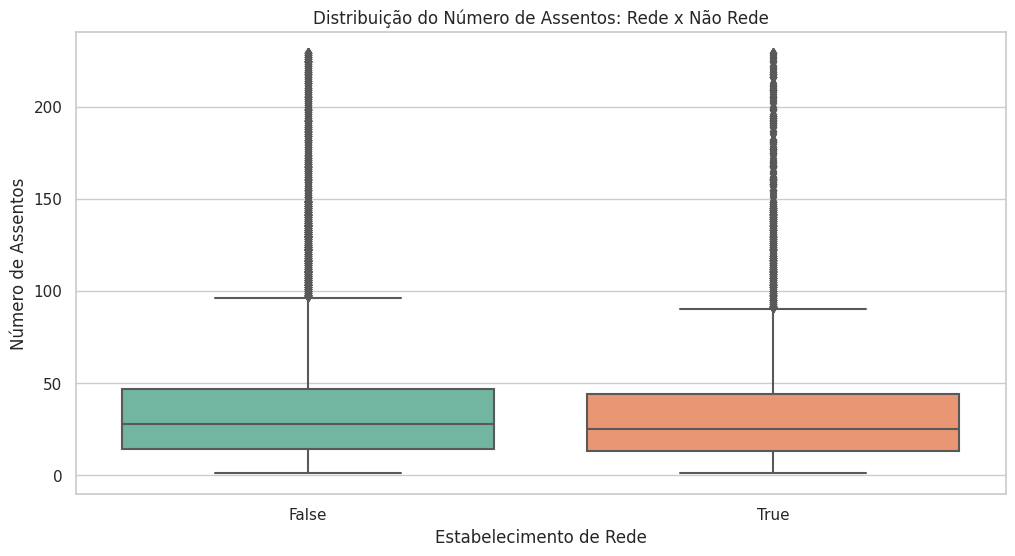

In [7]:
# Assentos médios porestabelecimento agrupados por rede ou não
avg_seats_by_chain = rest_data.groupby('chain')['number'].mean()
print(avg_seats_by_chain)

# Boxplot para visualizar distribuição
sns.boxplot(x='chain', y='number', data=rest_data, palette='Set2')
plt.title('Distribuição do Número de Assentos: Rede x Não Rede')
plt.xlabel('Estabelecimento de Rede')
plt.ylabel('Número de Assentos')
plt.show()




Redes tendem a operar com um número **menor de assentos** por unidade, sugerindo que seu foco está na eficiência e alta rotatividade. Já estabelecimentos independentes tendem a ter mais assentos, talvez por priorizarem conforto ou permanência longa do cliente.


### 5. Número médio de assentos por tipo de restaurante

Identificaremos qual tipo tem mais assentos em média.


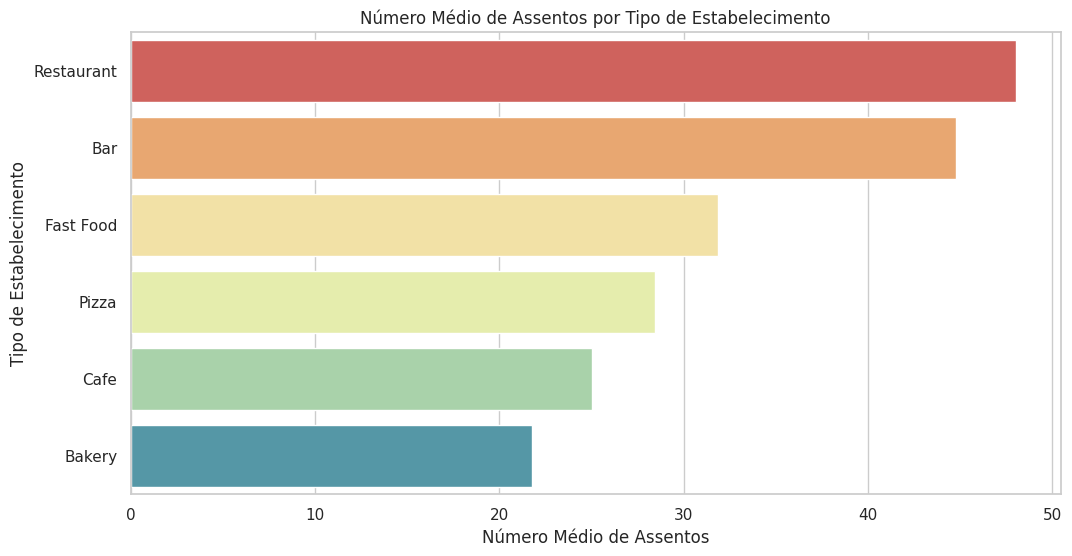

In [8]:
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)
sns.barplot(y=avg_seats_by_type.index, x=avg_seats_by_type.values, palette='Spectral')
plt.title('Número Médio de Assentos por Tipo de Estabelecimento')
plt.xlabel('Número Médio de Assentos')
plt.ylabel('Tipo de Estabelecimento')
plt.show()



Esse dado nos ajuda a entender a expectativa de tamanho para cada tipo de estabelecimento. Por exemplo, cafés geralmente têm menos assentos, enquanto “buffets” ou “diners” tendem a ocupar espaços maiores. Isso influencia diretamente o planejamento do layout da nova cafeteria.


### 6. Extração do nome da rua a partir da coluna `address`

Vamos criar uma coluna `street` com o nome da rua.


In [9]:

# Extraíremos o nome da rua entre o número e a vírgula

def extract_street(address):
    try:
        # Remove número inicial e extrai o que vem depois até a vírgula
        return address.split(' ', 1)[1].split(',',1)[0].strip()
    except:
        return None

rest_data['street'] = rest_data['address'].apply(extract_street)

rest_data[['address', 'street']].head()


,address,street
0,3708 N EAGLE ROCK BLVD,N EAGLE ROCK BLVD
1,100 WORLD WAY 120,WORLD WAY 120
2,6801 HOLLYWOOD BLVD 253,HOLLYWOOD BLVD 253
3,1814 W SUNSET BLVD,W SUNSET BLVD
4,2100 ECHO PARK AVE,ECHO PARK AVE



Criamos uma nova coluna com os nomes das ruas para permitir análises geográficas. Esse passo é essencial para localizar áreas mais movimentadas ou promissoras para abrir um novo negócio.


### 7. Top 10 ruas com maior número de restaurantes


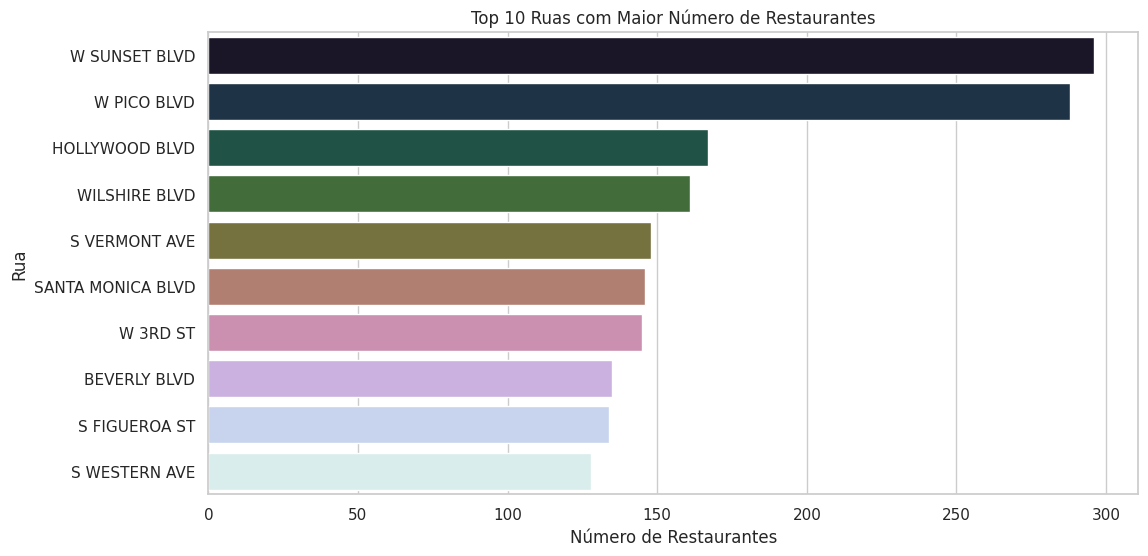

In [10]:
top_streets = rest_data['street'].value_counts().head(10)
sns.barplot(y=top_streets.index, x=top_streets.values, palette='cubehelix')
plt.title('Top 10 Ruas com Maior Número de Restaurantes')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Rua')
plt.show()




As ruas com maior concentração de restaurantes mostram zonas quentes do mercado. Essas áreas podem ter mais tráfego de clientes, mas também mais concorrência. A presença em uma dessas ruas pode ser vantajosa se o diferencial for claro (como garçons robôs).


### 8. Número de ruas com apenas 1 restaurante


In [11]:
single_restaurant_streets = (rest_data['street'].value_counts() == 1).sum()
print(f'Número de ruas com apenas 1 restaurante: {single_restaurant_streets}')


Número de ruas com apenas 1 restaurante: 2450


### 9. Distribuição do número de assentos nas ruas com muitos restaurantes

Vamos olhar para a distribuição de assentos nas ruas que possuem vários restaurantes para identificar tendências.


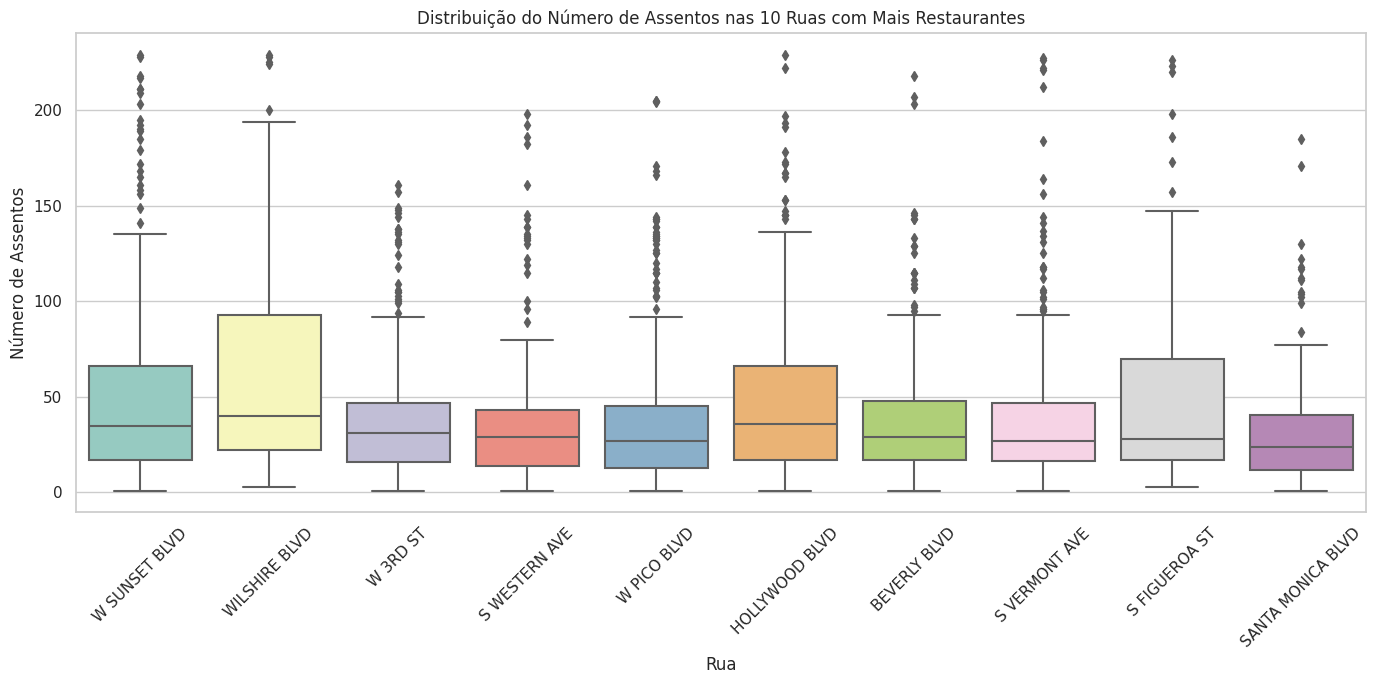

In [12]:
# Seleciona as 10 ruas com mais restaurantes
top_10_busy_streets = rest_data['street'].value_counts().head(10).index

# Filtra os dados apenas para essas ruas
filtered_data = rest_data[rest_data['street'].isin(top_10_busy_streets)]

# Gráfico
plt.figure(figsize=(14,7))
sns.boxplot(x='street', y='number', data=filtered_data, palette='Set3')
plt.title('Distribuição do Número de Assentos nas 10 Ruas com Mais Restaurantes')
plt.xlabel('Rua')
plt.ylabel('Número de Assentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Existem diversas ruas com apenas um estabelecimento. Isso pode indicar áreas ainda não saturadas ou com pouca atratividade comercial. Pode valer a pena investigar se o baixo número é devido à baixa demanda ou falta de concorrência.


### 10. Conclusão e recomendações

Com base na análise dos dados, descreva aqui suas conclusões e recomendações sobre:

- O tipo mais apropriado de restaurante para abrir a cafeteria com garçons robôs.
- O número ideal de assentos para esse estabelecimento.
- A viabilidade de desenvolver uma rede de estabelecimentos.


# Passo 3 — Apresentação

Crie uma apresentação para os investidores contendo os pontos principais da análise e recomendações. Salve em PDF e disponibilize um link para o acesso.

**Presentation:** https://drive.google.com/file/d/1art70Z40P-7f_iqePr5ZMJu5ek0uxT_V/view?usp=sharing
